# Series de Tiempo

## Series de Tiempo en la APN

Una API REST es un servicio web que permite hacer consultas a una base de datos o aplicación en línea. Muchas APIs pueden usarse simplemente como una URL configurable / parametrizable en el navegador.

La Administración Pública Nacional dispone de APIs de datos en las que todos los organismos pueden publicar: https://apis.datos.gob.ar

Una de ellas permite consultar indicadores con evolución temporal de distintos ministerios (actualmente +20 mil series):

* **Documentación API**: https://apis.datos.gob.ar/series
* **Buscador web de series**: http://datos.gob.ar/series (permite buscar los ids de las series deseadas)

El buscador permite llevarse una URL a la API que descarga un CSV actualizado de los indicadores elegidos:

* **Tipo de cambio vendedor BNA**: http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=168.1_T_CAMBIOR_D_0_0_26&format=csv
* **IPC Nacional. Nivel General**: http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26&format=csv
* **EMAE**: http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=143.3_NO_PR_2004_A_21&format=csv

Como te podrás imaginar, `limit`, `ids` y `format` son algunos de esos parámetros que te permiten personalizar la consulta:

* `ids`: el parámetro más importante! Permite pedir una lista de series por id, separados por comas.
* `format`: puede ser "csv" o "json".
* `limit`: por default la API devuelve 100 filas, pero se puede extender hasta 1000.

En la mayoría de las APIs REST, los parámetros empiezan después del `?` y se separan por `&`.

![](ejemplo_consulta.png)

## Time series dataframes

### Descargar CSVs de la API de series de tiempo

a. Descargar el IPC en un dataframe de R. Hint: `df = read.csv(*)` 

In [1]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26&format=csv")
tail(df)

,indice_tiempo,ipc_nivel_general_nacional
18,2018-05-01,139.5893
19,2018-06-01,144.8053
20,2018-07-01,149.2966
21,2018-08-01,155.1034
22,2018-09-01,165.2383
23,2018-10-01,174.1473


b. Descargar el Estimador Mensual de la Actividad Económica (EMAE) general, de la Construcción y de la Industria Manufacturera en el mismo dataframe. Hint: `ids=*,*,*.` 

In [2]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=143.3_NO_PR_2004_A_21,11.3_VMASD_2004_M_23,11.3_VMATC_2004_M_12&format=csv")
tail(df)

,indice_tiempo,indice_serie_original,industria_manufacturera,construccion
171,2018-03-01,155.6816,134.2285,160.7265
172,2018-04-01,152.7067,130.3412,150.3414
173,2018-05-01,161.5906,140.0652,155.4314
174,2018-06-01,151.2358,128.5660,149.6231
175,2018-07-01,147.2753,130.8963,151.7200
176,2018-08-01,146.4046,132.6932,161.1219


c. Descargar el tipo de cambio mínimo, promedio y máximo mensual, usando la API (sin programar para eso en R). Hint: `&collapse=month` transforma la llamada en "mensual" y `&ids=*:min,*:avg` indica cómo agregar los valores de esas series.

In [3]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=168.1_T_CAMBIOR_D_0_0_26:min,168.1_T_CAMBIOR_D_0_0_26:avg,168.1_T_CAMBIOR_D_0_0_26:max&collapse=month&format=csv")
tail(df)

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_bna_vendedor.1,tipo_cambio_bna_vendedor.2
44,2018-06-01,24.90,26.67433,28.85
45,2018-07-01,27.21,27.60765,28.85
46,2018-08-01,27.29,29.93758,37.60
47,2018-09-01,36.85,38.49607,41.25
48,2018-10-01,35.95,37.03032,39.60
49,2018-11-01,35.40,NA,36.05


d. Descargar el IPC, la inflación mensual y la inflación inter-anual en un mismo dataframe, usando la API (sin programar para eso en R) sólo desde 2017 en adelante. Hint: `&ids=*:percent_change,*:percent_change_a_year_ago` / `&start_date=*`.

In [4]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26,148.3_INIVELNAL_DICI_M_26:percent_change,148.3_INIVELNAL_DICI_M_26:percent_change_a_year_ago&start_date=2017&format=csv")
tail(df)

,indice_tiempo,ipc_nivel_general_nacional,ipc_nivel_general_nacional.1,ipc_nivel_general_nacional.2
17,2018-05-01,139.5893,0.02075375,0.2629076
18,2018-06-01,144.8053,0.03736676,0.2946650
19,2018-07-01,149.2966,0.03101613,0.3120916
20,2018-08-01,155.1034,0.03889439,0.3442611
21,2018-09-01,165.2383,0.06534286,0.4054234
22,2018-10-01,174.1473,0.05391607,0.4590969


### Buscar relaciones entre series de tiempo

Las series de tiempo tienen la característica distintiva de que todas están relacionadas con un índice de tiempo (son datos estructurados cronológicamente, con una frecuencia determinada). Esto nos permite agregar nuevas posibilidades en la búsqueda de relaciones entre variables.

a. Crear un modelo que explique el IPC nivel general nacional en base a las expectativas de inflación futura desde el 2017 en adelante, y hacer un scatter plot con su recta de regresión.

    a1. Descargar en un mismo dataframe ambas series. Hint: df = read.csv("https://apis.datos.gob.ar/series/api/series/?limit=1000&ids=*:percent_change,*&format=csv&start_date=2017")
    a2. Generar el primer modelo de regresión con los primeros 22 valores de c/u. Hint: modelo0 = lm(df$*[1:22] ~ df$*[1:22])
    a3. Scatter plot de las dos variables y agregar la recta de regresión. Hint: plot(df$*[1:22] ~ df$*[1:22]); abline(modelo0)

In [5]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26:percent_change,430.1_MEDIANA_IP_12_M_0_0_27_96&format=csv&start_date=2017")
head(df)

indice_tiempo,ipc_nivel_general_nacional,rem_ipc_nac_var_ia_t_12
2017-01-01,0.01585900,0.1970
2017-02-01,0.02067216,0.1950
2017-03-01,0.02374190,0.1840
2017-04-01,0.02655830,0.1751
2017-05-01,0.01434750,0.1700
2017-06-01,0.01192073,0.1700


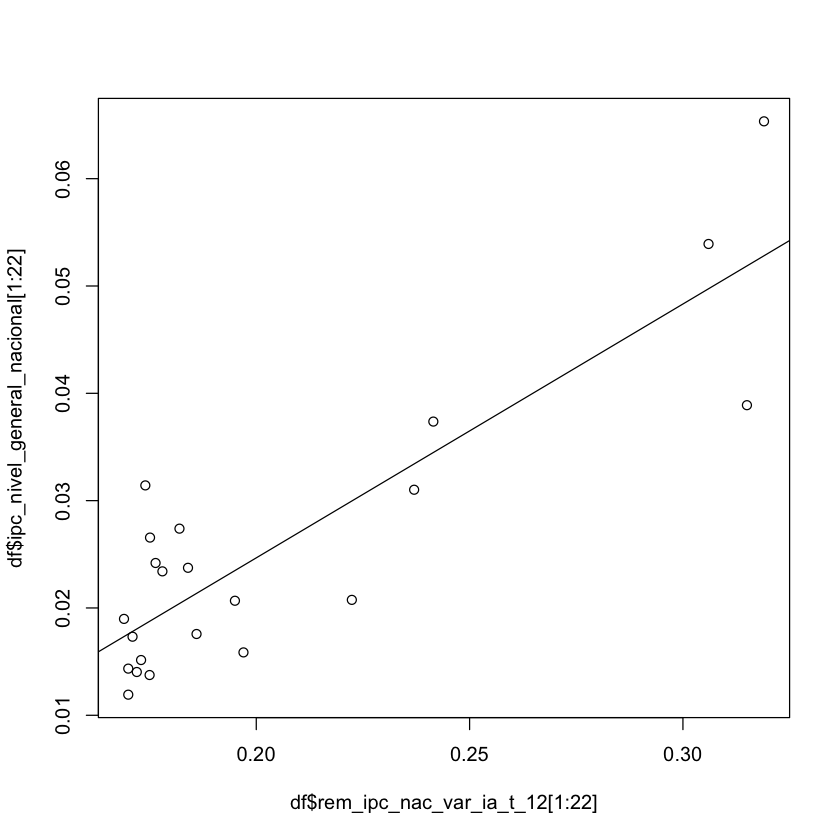

In [6]:
modelo0 = lm(df$ipc_nivel_general_nacional[1:22] ~ df$rem_ipc_nac_var_ia_t_12[1:22])

plot(df$rem_ipc_nac_var_ia_t_12[1:22],df$ipc_nivel_general_nacional[1:22])

abline(modelo0)

b. Existe una correlación! Pero tal vez las expectativas de inflación futura inciden con uno o dos meses de retraso en la inflación mensual real? 

Para esto hace falta comparar una regresión entre las dos variables, contra una en la que las expectativas están 1 o 2 meses *adelantadas*. Esto requiere tratar las variables como series de tiempo y aplicarles *lags*. Para comparar el rendimiento del mismo modelo con lags diferentes, vamos a hacer un gráfico partido en 4 para ver cómo se comporta cada uno.

    b1. Generar 3 modelos: uno sin lags, uno con 1 mes de lag y otro con 2 meses de lag. Hint: modelo0 = lm(df$*[1:22] ~ df$*[1:22]); modelo1 = lm(df$*[2:22] ~ df$*[1:21]); modelo2 = lm(df$*[3:22] ~ df$*[1:20]); 
    b1. Partir la pantalla en 4. Hint: par(mfrow=c(*,*))
    b2. Graficar nuevamente el scatter plot con la recta de regresión (como en el punto anterior) para los 3 modelos. Hint: plot(*, *); abline(*)
    b3. Agregar un gráfico comparando los R2 de cada modelo contra la cantidad de *lags* aplicados. Hint:
    
        info0=summary(modelo0)
        info1=summary(modelo1)
        info2=summary(modelo2)

        ajuste=c(info0$r.squared,info1$r.squared,info2$r.squared)

        plot(c(0,1,2),ajuste,xlab="Lag",ylab="Bondad del ajuste [R2]",pch=16)
        
    b4. Corroborar, de todas formas, que ninguno de los 3 modelos es muy bueno porque hay estructura en sus residuos.... Necesitaremos más variables explicativas?


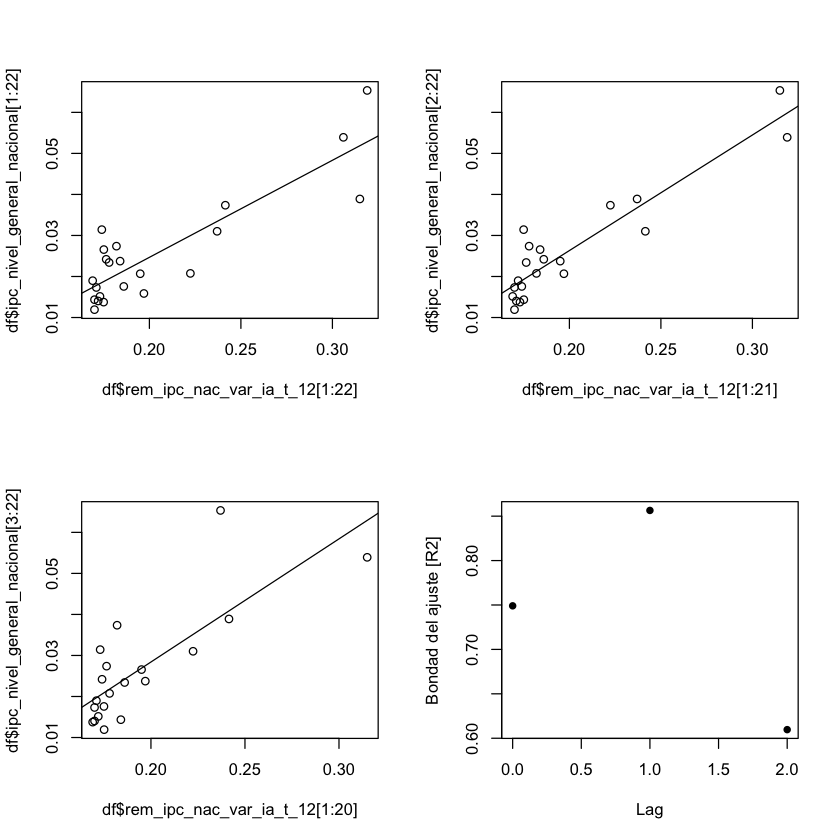

In [28]:
# Modelos con y sin lags
modelo0 = lm(df$ipc_nivel_general_nacional[1:22] ~ df$rem_ipc_nac_var_ia_t_12[1:22])

modelo1 = lm(df$ipc_nivel_general_nacional[2:22] ~ df$rem_ipc_nac_var_ia_t_12[1:21])

modelo2 = lm(df$ipc_nivel_general_nacional[3:22] ~ df$rem_ipc_nac_var_ia_t_12[1:20])


# Gráficos de cada modelo
par(mfrow=c(2,2))

plot(df$rem_ipc_nac_var_ia_t_12[1:22], df$ipc_nivel_general_nacional[1:22])

abline(modelo0)

plot(df$rem_ipc_nac_var_ia_t_12[1:21], df$ipc_nivel_general_nacional[2:22])

abline(modelo1)

plot(df$rem_ipc_nac_var_ia_t_12[1:20], df$ipc_nivel_general_nacional[3:22])

abline(modelo2)


# Gráfico comparando los R2 de c/modelo
info0=summary(modelo0)

info1=summary(modelo1)

info2=summary(modelo2)


ajuste=c(info0$r.squared,info1$r.squared,info2$r.squared)

plot(c(0,1,2),ajuste,xlab="Lag",ylab="Bondad del ajuste [R2]",pch=16)

Bonus track! Existen dos librerías que facilitan el uso de *lags* en regresiones con series de tiempo llamada `dynlm` y `Hmisc`. Requiere que el dataframe se reconozca como un dataframe *de series de tiempo, con un índice de tiempo* y permite aplicar lags con una función más fácilmente...
    
    b1. install.packages("dynlm"); install.packages("Hmisc"); library(Hmisc); library("dynlm") (Instala y carga librerías de regresión para series de tiempo)
    b2. library(zoo); df_ts = read.zoo(df, index = 1, tz = "", format = "%Y-%m-%d") (Lee la primer columna como un índice de tiempo con "zoo")
    b3. Regresar la inflación mensual contra las expectativas de inflación futura. Hint: summary(dynlm(df_ts$* ~ df_ts$*))
    b3. Regresar la inflación mensual contra las expectativas de inflación futura desfasadas 1 mes antes. Hint: summary(dynlm(df_ts$* ~ lag(df_ts$*, -1))).
    b4. Comparar los R2 de cada regresión. ¿Mejoró el % de variabilidad de la inflación mensual explicado?

In [8]:
install.packages("dynlm"); install.packages("Hmisc"); library(Hmisc); library("dynlm")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [9]:
library(zoo); df_ts = read.zoo(df, index = 1, tz = "", format = "%Y-%m-%d")

In [10]:
summary(dynlm(
    df_ts$ipc_nivel_general_nacional ~ 
    df_ts$rem_ipc_nac_var_ia_t_12
))


Time series regression with "zoo" data:
Start = 2017-01-01, End = 2018-10-01

Call:
dynlm(formula = df_ts$ipc_nivel_general_nacional ~ df_ts$rem_ipc_nac_var_ia_t_12)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.012976 -0.003955 -0.001445  0.004117  0.012902 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -0.022641   0.006417  -3.528  0.00211 ** 
df_ts$rem_ipc_nac_var_ia_t_12  0.236543   0.030614   7.727 1.99e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006897 on 20 degrees of freedom
Multiple R-squared:  0.7491,	Adjusted R-squared:  0.7365 
F-statistic:  59.7 on 1 and 20 DF,  p-value: 1.987e-07


In [11]:
summary(dynlm(
    df_ts$ipc_nivel_general_nacional ~ 
    Lag(df_ts$rem_ipc_nac_var_ia_t_12, 1)
))


Time series regression with "zoo" data:
Start = 2017-02-01, End = 2018-10-01

Call:
dynlm(formula = df_ts$ipc_nivel_general_nacional ~ Lag(df_ts$rem_ipc_nac_var_ia_t_12, 
    1))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0069912 -0.0048022 -0.0005475  0.0037380  0.0121414 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           -0.030008   0.005393  -5.564 2.29e-05 ***
Lag(df_ts$rem_ipc_nac_var_ia_t_12, 1)  0.281638   0.026454  10.646 1.90e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005281 on 19 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8564,	Adjusted R-squared:  0.8489 
F-statistic: 113.3 on 1 and 19 DF,  p-value: 1.901e-09


# LASSO

Como dijimos tal vez nos falten variables explicativas, la inflación es un fenómeno multicausal. Probablemente el mejor modelo explicativo sea uno que incluya muchas variables... La base de series de tiempo ofrece 20 mil! Si bien no tiene sentido probar con todas, habría que buscar un método que elija el mejor modelo al enfrentarse a muchas variables. (Ver tutorial de LASSO en R para más detalles: https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html )

a. Cargar en un dataframe de series de tiempo la inflación mensual, la tasa de interés, la variación mensual del tipo de cambio nominal, las expectativas de inflación futura y el tipo de cambio real multilateral, desde 2017. Hint: `df2 = read.csv("https://apis.datos.gob.ar/series/api/series/?limit=1000&ids=*:percent_change,*,*:percent_change,*,*&format=csv&start_date=2017")` 

In [12]:
df2 = read.csv("https://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26:percent_change,89.2_TS_INTE_PM_0_D_16,168.1_T_CAMBIOR_D_0_0_26:percent_change,430.1_MEDIANA_IP_12_M_0_0_27_96,116.3_TCRMA_0_M_36&format=csv&start_date=2017")

In [13]:
colnames(df2)

[1] "indice_tiempo"                       
[2] "ipc_nivel_general_nacional"          
[3] "tasas_interes_pm"                    
[4] "tipo_cambio_bna_vendedor"            
[5] "rem_ipc_nac_var_ia_t_12"             
[6] "tipo_cambio_real_multilateral_actual"

In [14]:
df2

indice_tiempo,ipc_nivel_general_nacional,tasas_interes_pm,tipo_cambio_bna_vendedor,rem_ipc_nac_var_ia_t_12,tipo_cambio_real_multilateral_actual
2017-01-01,0.01585900,24.75000,0.003517234,0.1970,90.65791
2017-02-01,0.02067216,24.75000,-0.020135332,0.1950,88.83677
2017-03-01,0.02374190,24.75000,-0.004182818,0.1840,86.54637
2017-04-01,0.02655830,25.70000,-0.010676656,0.1751,83.57614
2017-05-01,0.01434750,26.25000,0.023613498,0.1700,84.02443
2017-06-01,0.01192073,26.25000,0.023845717,0.1700,84.86319
2017-07-01,0.01732266,26.25000,0.066109731,0.1710,90.87417
2017-08-01,0.01403258,26.25000,0.014622869,0.1720,92.30178
2017-09-01,0.01898045,26.25000,-0.011230780,0.1690,90.44356
2017-10-01,0.01514733,26.58871,0.013274022,0.1730,88.88115


b. Usar el método lasso (librería `glmnet`) para encontrar el mejor modelo posible entre estas variables.

    b1. install.packages("glmnet", repos = "http://cran.us.r-project.org"); library(glmnet)  (Instala y carga glmnet)
    b2. Convertir el dataframe a series de tiempo. Hint: df_ts2 = read.zoo(*, index = 1, tz = "", format = "%Y-%m-%d")
    b3. Remover las filas que tengan algún valor nulo. Hint: * = *[complete.cases(*), ]
    b4. Crear variables con lags de 1 mes para analizar efectos desplazados en el tiempo. Hint: df_ts2$* = Lag(df_ts2$*, 1)
    b5. Crear una matriz de predictores x (sin la variable a predecir). Hint: x = data.matrix(subset(*, select=c("*", "*", "*")))
    b6. Correr lasso usando cross validation. Hint: cvfit = cv.glmnet(x, y)
    b7. Encontrar los coeficientes del modelo que minimiza el error de predicción. Hint: coef(cvfit)

In [15]:
install.packages("glmnet", repos = "http://cran.us.r-project.org")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [17]:
df_ts2 = read.zoo(df2, index = 1, tz = "", format = "%Y-%m-%d")

In [18]:
# genero variables con lags
df_ts2$rem_lag = Lag(df_ts2$rem_ipc_nac_var_ia_t_12, 1)
df_ts2$tc_lag = Lag(df_ts2$tipo_cambio_bna_vendedor, 1)
df_ts2$tcr_lag = Lag(df_ts2$tipo_cambio_real_multilateral_actual, 1)
df_ts2$ipc_lag = Lag(df_ts2$ipc_nivel_general_nacional, 1)

In [19]:
tail(df_ts2)

           ipc_nivel_general_nacional tasas_interes_pm tipo_cambio_bna_vendedor
2018-05-01                 0.02075375         39.15323               0.16539110
2018-06-01                 0.03736676         40.00000               0.13024673
2018-07-01                 0.03101613         40.00000               0.03498913
2018-08-01                 0.03889439         44.03226               0.08439458
2018-09-01                 0.06534286         60.50000               0.28587768
2018-10-01                 0.05391607         71.83500              -0.03807516
           rem_ipc_nac_var_ia_t_12 tipo_cambio_real_multilateral_actual rem_lag
2018-05-01                  0.2224                             100.6260  0.1820
2018-06-01                  0.2415                             108.4181  0.2224
2018-07-01                  0.2370                             108.5619  0.2415
2018-08-01                  0.3150                             112.3524  0.2370
2018-09-01                  0.3190      

In [20]:
df_ts2 = df_ts2[complete.cases(df_ts2), ]

In [21]:
colnames(df_ts2)

[1] "ipc_nivel_general_nacional"          
[2] "tasas_interes_pm"                    
[3] "tipo_cambio_bna_vendedor"            
[4] "rem_ipc_nac_var_ia_t_12"             
[5] "tipo_cambio_real_multilateral_actual"
[6] "rem_lag"                             
[7] "tc_lag"                              
[8] "tcr_lag"                             
[9] "ipc_lag"

In [22]:
predictors = subset(df_ts2, select=c("tasas_interes_pm",
                                     "tipo_cambio_bna_vendedor", "rem_ipc_nac_var_ia_t_12", "tipo_cambio_real_multilateral_actual",
                                     "rem_lag", "tc_lag", "tcr_lag", "ipc_lag"))
x = data.matrix(predictors)
y = df_ts2$ipc_nivel_general_nacional

In [23]:
cvfit = cv.glmnet(x, y)

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

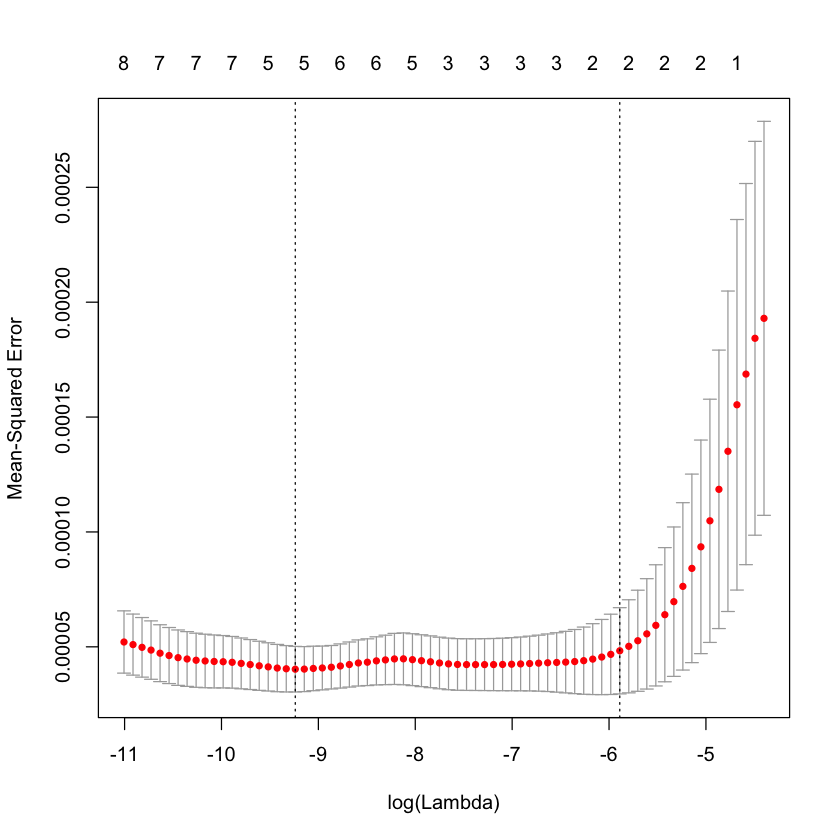

In [24]:
plot(cvfit)

In [25]:
coef(cvfit)

9 x 1 sparse Matrix of class "dgCMatrix"
                                                 1
(Intercept)                          -0.0231164669
tasas_interes_pm                      .           
tipo_cambio_bna_vendedor              .           
rem_ipc_nac_var_ia_t_12               .           
tipo_cambio_real_multilateral_actual  0.0001494918
rem_lag                               0.1744389322
tc_lag                                .           
tcr_lag                               .           
ipc_lag                               .           

c. Comparar la predicción del modelo con la realidad en un plot. Hint: `y_predict = predict(cvfit, newx = *)` y `plot(y, *)`

In [26]:
y_predict = predict(cvfit, newx = x)

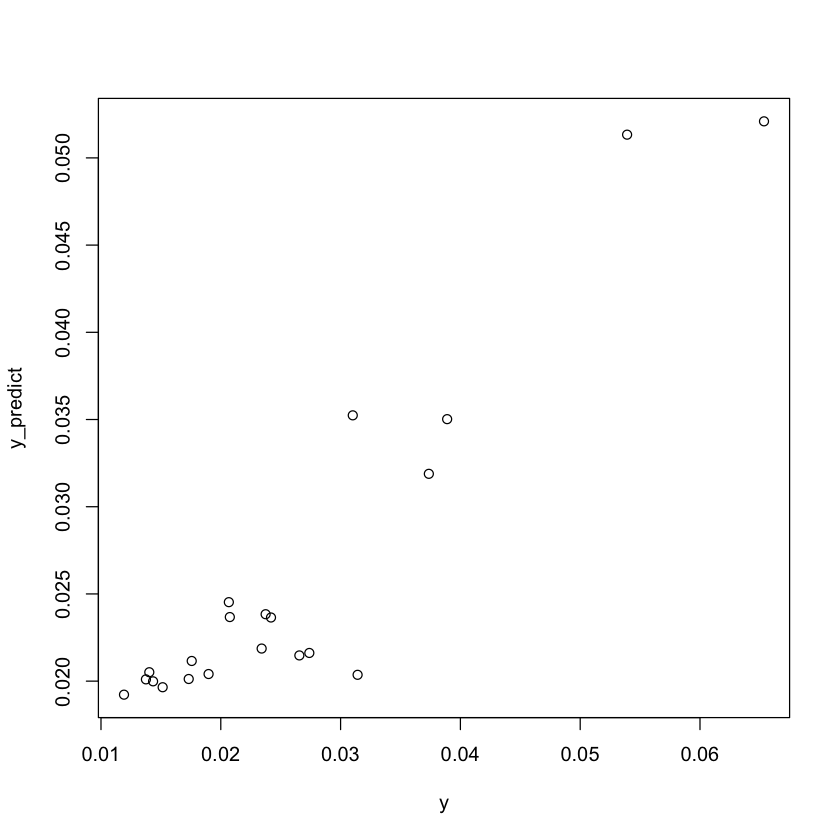

In [27]:
plot(y, y_predict)